In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision.datasets as dset
import torchvision.transforms as transforms

from math import exp

In [2]:
mnist_test =dset.MNIST("",train=False, transform=transforms.ToTensor(),
                      target_transform=None, download=True)

len of mnist_test: 10000
image data shape:  torch.Size([1, 28, 28])
label:  7


<function matplotlib.pyplot.show(close=None, block=None)>

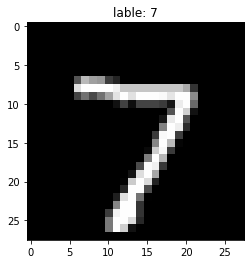

In [3]:
print("len of mnist_test:", len(mnist_test))

image, label = mnist_test.__getitem__(0)
print("image data shape: ", image.size()) # dimesion check
print("label: ", label)

img = image.numpy()
plt.title("lable: %d"%label)
plt.imshow(img[0], cmap='gray')
plt.show

In [4]:
# def sigmoid_func(x):
#     return 1/(1+exp(-x))

# def sigmoid(x):
#     x2 = map(sigmoid_func,x)
#     x2 = np.fromiter(x2,dtype = np.float32)
#     return x2
def sigmoid(x):
    return 1/(1+np.exp(x))
def softmax(x):
    x2 = [exp(i)/sum(list(map(exp,x))) for i in x]
    return x2

In [5]:
class MyMLP:
    def __init__(self, n_input, n_hidden1, n_hidden2, n_output):
        self.W1 = np.zeros((n_hidden1, n_input), dtype=np.float32)
        self.b1 = np.zeros((n_hidden1,), dtype=np.float32)
        
        self.W2 = np.zeros((n_hidden2, n_hidden1), dtype=np.float32)
        self.b2= np.zeros((n_hidden2,), dtype=np.float32)
        
        self.W3 = np.zeros((n_output, n_hidden2), dtype=np.float32)
        self.b3 = np.zeros((n_output,), dtype=np.float32)
        
    def __call__(self, x):
        x = x.reshape(-1)
        
        h1 = sigmoid(np.dot(self.W1, x) + self.b1)
        h2 = np.dot(self.W2, h1) + self.b2
        out = np.dot(self.W3, h2) + self.b3
        
        return softmax(out)

In [6]:
model = MyMLP(28*28, 256, 128, 10)

In [7]:
print(model.W1.shape, model.b1.shape)
print(model.W2.shape, model.b2.shape)
print(model.W3.shape, model.b3.shape)

(256, 784) (256,)
(128, 256) (128,)
(10, 128) (10,)


In [8]:
weights = np.load('/home/ec2-user/SageMaker/DL/mlp_weight.npz')

model.W1 = weights['W1']
model.b1 = weights['b1']
model.W2 = weights['W2']
model.b2 = weights['b2']
model.W3 = weights['W3']
model.b3 = weights['b3']

In [9]:
print(model.W1.shape, model.b1.shape)
print(model.W2.shape, model.b2.shape)
print(model.W3.shape, model.b3.shape)

(256, 784) (256,)
(128, 256) (128,)
(10, 128) (10,)


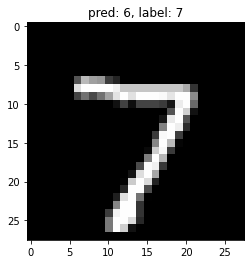

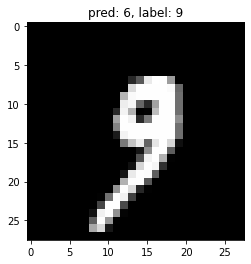

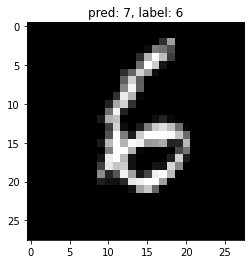

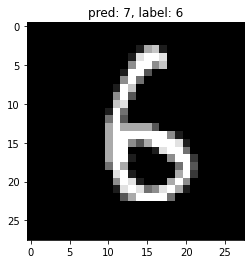

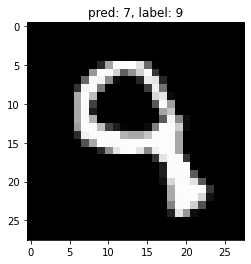

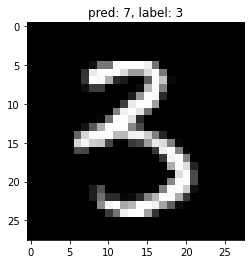

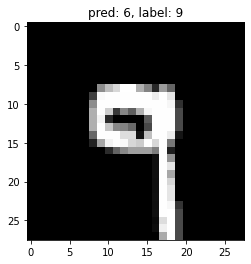

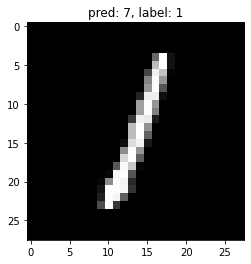

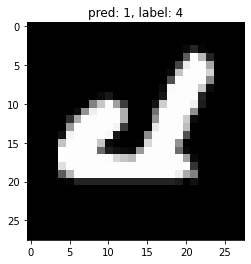

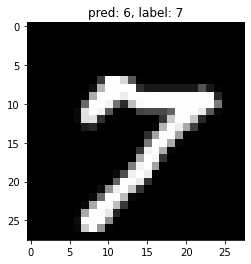

Accuracy: 0.05


In [10]:
mysum = 0 

m= len(mnist_test)
cnt = 0
for i in range(m):
    image, label = mnist_test.__getitem__(i)
    output = model(image)
    
    if(i%1000==0):
        img = image.numpy()
        pred_label = np.argmax(output)
        plt.title("pred: %d, label: %d"%(pred_label, label))
        plt.imshow(img[0],cmap='gray')
        plt.show()
        
    cnt += 1
    mysum += (np.argmax(output) == label)
    
print("Accuracy: %.2f"%((float(mysum) / cnt) * 100.0))